$$\Large \color{blue}{\textbf{An Introduction to Synthetic Minority Oversampling Technique}}$$
$$\Large \color{blue}{\textbf{(SMOTE)}}$$


$$\large \color{green}{\textbf{Phuong Van Nguyen}}$$
$$\small \color{red}{\textbf{ phuong.nguyen@summer.barcelonagse.eu}}$$



$\textbf{The dataset}$

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe (1/0) a term deposit (variable y). One can download this dataset from the following link.

http://archive.ics.uci.edu/ml/machine-learning-databases/00222/




# Preparing project

In [17]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
# Defining some varibale for printing the result
Purple= '\033[95m'
Cyan= '\033[96m'
Darkcyan= '\033[36m'
Blue = '\033[94m'
Green = '\033[92m'
Yellow = '\033[93m'
Red = '\033[91m'
Bold = "\033[1m"
Reset = "\033[0;0m"
Underline= '\033[4m'
End = '\033[0m'

# Importing the data

In [3]:
data = pd.read_csv('bank.csv', header=0,sep=';')
data = data.dropna()
print(data.shape)
print(list(data.columns))

(4521, 17)
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# EDA

## The target feature

A number of unique values in the target feature:
no     4000
yes     521
Name: y, dtype: int64
4000 or (88.48) percent people have not subscribed
521 or (11.52) percent people have subscribed


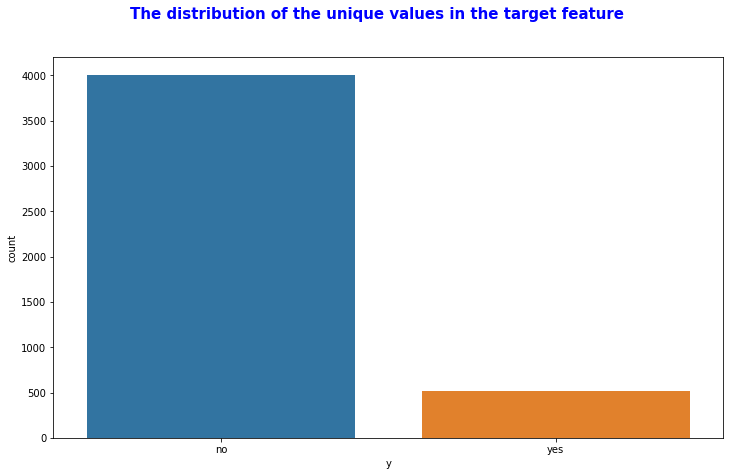

In [5]:
print(Bold+'A number of unique values in the target feature:'+End)
print(data['y'].value_counts())
print('%d or (%.2f) percent people have not subscribed'%(data['y'][data['y']=='no'].value_counts(),
                                                        100*data['y'][data['y']=='no'].value_counts()/
                                                        data['y'].value_counts().sum()))
print('%d or (%.2f) percent people have subscribed'%(data['y'][data['y']=='yes'].value_counts(),
                                                        100*data['y'][data['y']=='yes'].value_counts()/
                                                        data['y'].value_counts().sum()))

plt.figure(figsize=(12,7))
sns.countplot(x='y',data=data)
plt.suptitle('The distribution of the unique values in the target feature',
            fontweight='bold',fontsize=15, color='b')
plt.show()

In [6]:
y=data.loc[:,data.columns=='y']
y.head(3)

,y
0,no
1,no
2,no


## The explanatory variables

In [7]:
X=data[data.columns[0:16]]
print(Bold+'The number of explanatory variables:'+ End +'%d'%len(X.columns))
print(Bold+'List of explanatory variables:'+End)
print(X.columns.tolist())
print(Bold+ 'The first'+ End + '%d'%len(X.head(3)) + Bold +
      'Obs of Explanatory variables:'+End)
print(X.head(3))

The number of explanatory variables:16
List of explanatory variables:
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']
The first3Obs of Explanatory variables:
   age         job  marital  education default  balance housing loan  \
0   30  unemployed  married    primary      no     1787      no   no   
1   33    services  married  secondary      no     4789     yes  yes   
2   35  management   single   tertiary      no     1350     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  
0  cellular   19   oct        79         1     -1         0  unknown  
1  cellular   11   may       220         1    339         4  failure  
2  cellular   16   apr       185         1    330         1  failure  


In [8]:
print(Bold+'The number of categorical variables:'+End+
    '%d'%(len(X.loc[:,X.dtypes==np.object].columns)))
print(Bold+'List of categorical variables:'+End)
print(X.loc[:,X.dtypes==np.object].columns.tolist())

The number of categorical variables:9
List of categorical variables:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


# Preparing data

## Creating dummy variables

In [9]:
#cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
cat_vars=X.loc[:,X.dtypes==np.object].columns.tolist()
cat_vars

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [10]:
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

In [11]:
data1.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,0,0,0,0,1,0,0,0,0,1
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,0,0,1,0,0,0,1,0,0,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,0,0,0,0,0,0,1,0,0,0


In [12]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [13]:
data_final=data[to_keep]
data_final.columns.values

array(['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'], dtype=object)

## The target and exp. variables

In [14]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']

## Spliting data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)

## SMOTE

In [18]:
import imblearn

In [19]:
from imblearn.over_sampling import SMOTE

In [20]:
os_smote=SMOTE(random_state=0)

In [22]:
os_data_X,os_data_y=os_smote.fit_sample(X_train, y_train)

In [25]:
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
os_data_y.head(3)

,y
0,no
1,no
2,no


In [27]:
print(Bold+'A number of unique values in the target feature:'+End)
print(os_data_y['y'].value_counts())

A number of unique values in the target feature:
yes    2810
no     2810
Name: y, dtype: int64


2810 or (50.00) percent people have not subscribed
2810 or (50.00) percent people have subscribed


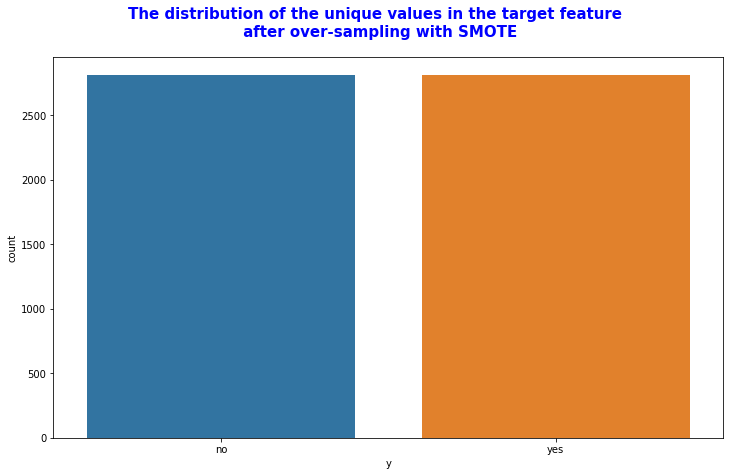

In [31]:
print('%d or (%.2f) percent people have not subscribed'%(os_data_y['y'][os_data_y['y']=='no'].value_counts(),
                                                        100*os_data_y['y'][os_data_y['y']=='no'].value_counts()/
                                                        os_data_y['y'].value_counts().sum()))
print('%d or (%.2f) percent people have subscribed'%(os_data_y['y'][os_data_y['y']=='yes'].value_counts(),
                                                        100*os_data_y['y'][os_data_y['y']=='yes'].value_counts()/
                                                        os_data_y['y'].value_counts().sum()))

plt.figure(figsize=(12,7))
sns.countplot(x='y',data=os_data_y)
plt.suptitle('The distribution of the unique values in the target feature \n after over-sampling with SMOTE',
            fontweight='bold',fontsize=15, color='b')
plt.show()